Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


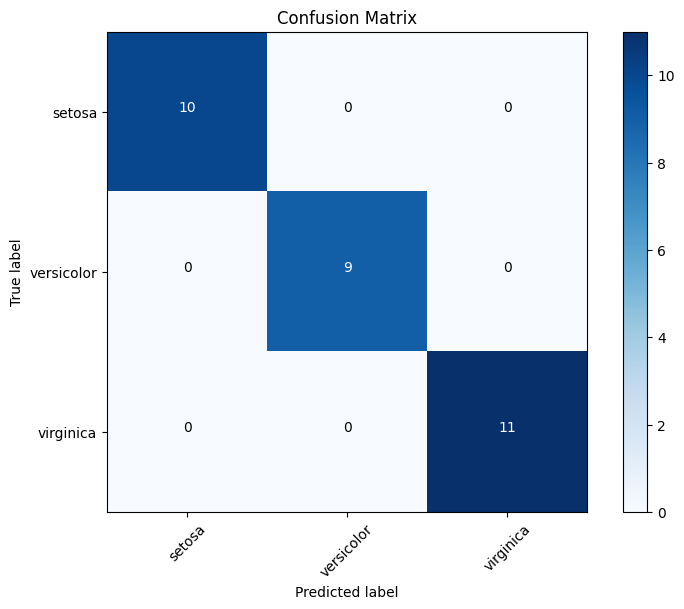

In [5]:
#1

# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分数据集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练 SVM 模型，使用线性核函数，随机种子42
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 预测测试集
y_pred = svm_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印评估指标
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# 可视化混淆矩阵（使用 Matplotlib）
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# 添加文本标签
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [2]:
# 导入库
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

try:
    # 加载数据集
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
except Exception as e:
    print(f"数据加载失败: {e}")
else: 
    # 查看类别标签、数据集的描述、数据样本
    print("类别标签:", newsgroups.target_names)
    print("数据集描述:", newsgroups.DESCR[:500])  # 只显示前500个字符
    print("数据样本:", newsgroups.data[0][:500])  # 只显示前500个字符

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 画出混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 